In [32]:
%load_ext autoreload
%autoreload 2

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import sys

sys.path.append('../src/')

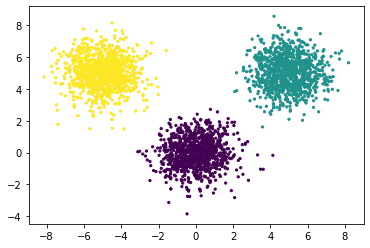

In [13]:
# Create dummy dataset
centers=[[0,0],[5,5],[-5,5]]
n_samples=len(centers) * 1000
n_features=2
#random_state=96

X,y=make_blobs(n_samples=n_samples,centers=centers,n_features=2,random_state=96)
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.show()

In [16]:
df=pd.DataFrame(X,columns=['dim_1','dim_2'])
df['cluster_label']=y

In [23]:
cluster_probability={
    0:0.05,
    1:0.20,
    2:0.50
}

cluster_size=df.groupby('cluster_label').size().to_dict()

df['positive_class']=0

for k,v in cluster_size.items():
    indices=df.loc[df['cluster_label']==k].index.tolist()
    positive_indices=np.random.choice(indices,size=int(cluster_size[k]*cluster_probability[k]),replace=False)
    df.loc[positive_indices,'positive_class']=1

In [24]:
df.groupby('cluster_label')['positive_class'].value_counts()

cluster_label  positive_class
0              0                 950
               1                  50
1              0                 800
               1                 200
2              0                 500
               1                 500
Name: positive_class, dtype: int64

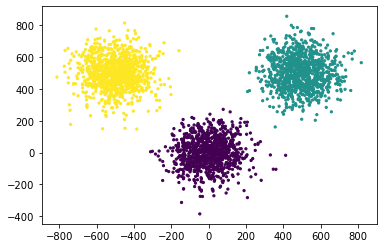

In [25]:
plt.scatter(X[:,0]*100,X[:,1]*100,c=y,s=5)

In [31]:
df[['dim_1','dim_2']].values

array([[-6.33510563,  2.31982393],
       [ 0.50036146, -1.51229301],
       [-1.09015264,  0.59765443],
       ...,
       [ 5.44500627,  4.50604264],
       [-0.29790614,  1.10112272],
       [-4.85620915,  6.41769807]])

In [35]:
from density_map import density_map

In [140]:
dm=density_map(
        df,
        'dim_1',
        'dim_2',
        'positive_class',
        (500,500),
        (60,60),
        0.1,
        2
)

In [141]:
result=dm.get_density_map()

(246, 246)


246it [00:12, 19.67it/s]


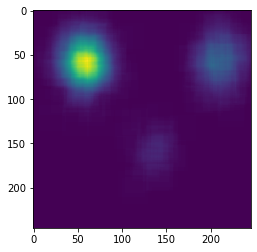

In [142]:
plt.imshow(result[0])

In [119]:
data=result[1]

In [120]:
data

array([[-169.04935124,  118.32715335],
       [  40.32647161,  -35.8399629 ],
       [  -8.39224707,   49.04380156],
       ...,
       [ 191.78489618,  206.27933171],
       [  15.87489682,   69.29846925],
       [-123.7495694 ,  283.18575411]])

In [88]:
np.where(result>0)

(array([], dtype=int64), array([], dtype=int64))

In [59]:
get_data_bounds([1,2,3],[4,5,6])

[1, 2, 3]


((1, 3), (4, 6))